In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(42)

In [3]:
tiger_tail_length = np.random.normal(loc=8, scale=1, size=100)
tiger_body_size = np.random.normal(loc=5, scale=1, size=100)

In [4]:
lion_tail_length = np.random.normal(loc=5, scale=1, size=100)
lion_body_size = np.random.normal(loc=8, scale=1, size=100)

In [5]:
tigers_data = np.vstack((tiger_tail_length, tiger_body_size)).T
lions_data = np.vstack((lion_tail_length, lion_body_size)).T
data = np.vstack((tigers_data, lions_data))
labels = np.hstack((np.zeros(len(tigers_data)), np.ones(len(lions_data))))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

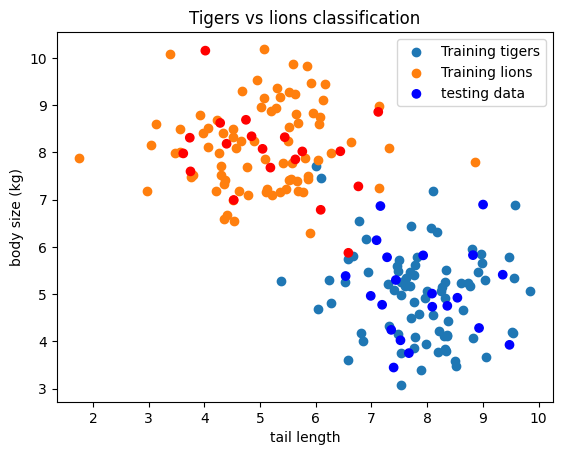

In [7]:
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Training tigers')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Training lions')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', label='testing data')
plt.xlabel('tail length')
plt.ylabel('body size (kg)')
plt.title('Tigers vs lions classification')
plt.legend()
plt.show()

In [8]:
# Define a more robust initialization method
def initialize_theta(x_train, y_train):
    theta = np.random.randn(x_train.shape[1])
    theta0 = np.random.randn(1)
    return theta, theta0

In [9]:
# define a more sophisticated error computation method
def compute_error(x_train, y_train, theta, theta0):
    predictions = np.dot(x_train, theta) + theta0
    errors = np.mean((predictions > 0) != y_train)
    return errors

In [10]:
# Define the random linear classifier with regularization
def random_linear_classifier(x_train, y_train, k, d, lambda_val):
    theta, theta0 = initialize_theta(x_train, y_train)
    for _ in range(k):
        # Compute the gradient of the loss function
        gradient = np.dot(x_train.T, (np.dot(x_train, theta) + theta0 - y_train)) / len(x_train)
        # Update theta and theta0 using gradient descent
        theta -= 0.01 * (gradient + lambda_val * theta)
        theta0 -= 0.01 * np.mean(np.dot(x_train, theta) + theta0 - y_train)
    return theta, theta0

In [11]:
# Define the k-fold cross-validation function
def cross_validate(x_train, y_train, k_values, d, lambda_val, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []
    for k in k_values:
        errors = []
        for train_index, val_index in kf.split(x_train):
            x_train_fold = x_train[train_index]
            y_train_fold = y_train[train_index]
            x_val_fold = x_train[val_index]
            y_val_fold = y_train[val_index]
            theta, theta0 = random_linear_classifier(x_train_fold, y_train_fold, k, d, lambda_val)
            error = compute_error(x_val_fold, y_val_fold, theta, theta0)
            errors.append(error)
        avg_errors.append(np.mean(errors))
    return avg_errors


In [12]:
# Define the hyperparameter tuning function
def tune_hyperparameters(x_train, y_train, k_values, d, lambda_values):
    best_k = None
    best_lambda = None
    best_error = float('inf')
    for k in k_values:
        for lambda_val in lambda_values:
            errors = []
            for _ in range(10):
                theta, theta0 = random_linear_classifier(x_train, y_train, k, d, lambda_val)
                error = compute_error(x_train, y_train, theta, theta0)
                errors.append(error)
            avg_error = np.mean(errors)
            if avg_error < best_error:
                best_error = avg_error
                best_k = k
                best_lambda = lambda_val
    return best_k, best_lambda

In [13]:
# Define the k values and lambda values to tune
k_values = [1, 10, 50, 100]
lambda_values = [0.01, 0.1, 1, 10]


In [14]:
# Tune the hyperparameters
best_k, best_lambda = tune_hyperparameters(x_train, y_train, k_values, x_train.shape[1], lambda_values)

In [15]:
best_k

1

In [16]:
# Train the model with the best hyperparameters
theta, theta0 = random_linear_classifier(x_train, y_train, best_k, x_train.shape[1], best_lambda)

In [17]:
# Compute the training error
training_error = compute_error(x_train, y_train, theta, theta0)
print(f"Training error: {training_error}")


Training error: 0.9625


In [18]:
# Evaluate the model on the test set
test_error = compute_error(x_test, y_test, theta, theta0)
print(f"Test error: {test_error}")


Test error: 0.925


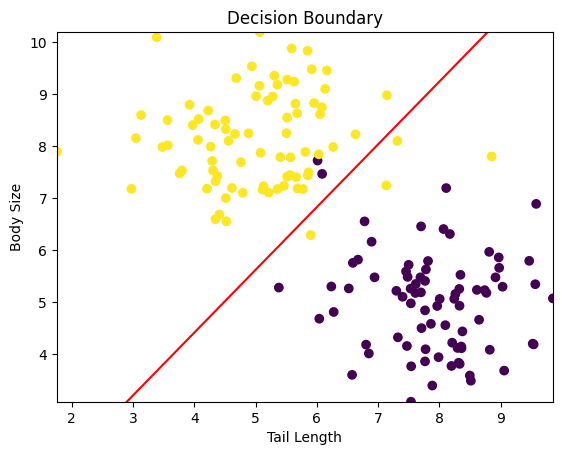

In [19]:
# Plot the decision boundary
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
x_min, x_max = x_train[:, 0].min(), x_train[:, 0].max()
y_min, y_max = x_train[:, 1].min(), x_train[:, 1].max()
x_vals = np.linspace(x_min, x_max, 100)
y_vals = (-theta[0] * x_vals - theta0) / theta[1]
plt.plot(x_vals, y_vals, 'r-')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Tail Length')
plt.ylabel('Body Size')
plt.title('Decision Boundary')
plt.show()







